In [1]:
import matplotlib.pyplot as plt

In [2]:
%run ProtCB-Bind.ipynb
%run ../Functions/Excel_Functions.ipynb
%run ../Functions/Labels.ipynb

In [3]:
#load TS88 Features
file_path = '../../Data/SVM_Dataset/ts88_features.npy' #Path to SVM model
svm_ts88 = np.load(file_path, allow_pickle=True)

file_path = '../../Data/ETC_Dataset/ts88_features.npy' #Path to ETC model
etc_ts88 = np.load(file_path, allow_pickle=True)

file_path = '../../Data/SGD_Dataset/ts88_features.npy' #Path to ETC model
sgd_ts88 = np.load(file_path, allow_pickle=True)


#Load TS88 Labels
_label = Label()
TS88_Labels = _label.GetLabel("../../Data/TS88/", "TS88_Files")
TS88_Labels = TS88_Labels[:,1]
TS88_Labels = TS88_Labels.astype(int)

In [4]:
Excel_A = Excel_Files()
Excel_A.Create_Workbook(f"../../Results/Predictor_Performance_TS88")
Excel_A.Create_Worksheet(f"TS88")
Excel_A.WriteHeader("Summary")

In [5]:
model_name = 'ProtCB-Bind'
pred_prob, pred, tn, fn, tp, fp, sensitivity, specificity, auc_m, acc, mcc, bacc = ProtCB_Bind(svm_ts88, etc_ts88, sgd_ts88, TS88_Labels)

data = [model_name, '', tn, fn, tp, fp, sensitivity, specificity, auc_m, acc, mcc,bacc]  
print(data)
Excel_A.Write_Line(data)

Excel_A.Close_WorkBook()

Performance Scores:
BACC: 0.7457980192648817, Sens: 0.6322674418604651, Spec: 0.8593285966692982, AUC: 0.7967551600175897, ACC: 0.853604016270292, MCC: 0.21404277516755776
['ProtCB-Bind', '', 22859, 253, 435, 3742, 0.6322674418604651, 0.8593285966692982, 0.7967551600175897, 0.853604016270292, 0.21404277516755776, 0.7457980192648817]


In [6]:
stackcb_pred_ts88_label = np.loadtxt('../../Data/Probabilities/StackCB-Embed-TS88_Labels.txt', delimiter=',')

stackcbembed_pred = np.loadtxt('../../Data/Probabilities/StackCB-Embed-TS88_prob.txt', delimiter=',')
stackcb_pred = np.loadtxt('../../Data/Probabilities/StackCB-Pred-TS88_prob.txt', delimiter=',')

print(stackcbembed_pred.shape)
print(stackcb_pred.shape)

(27141, 2)
(27141, 2)


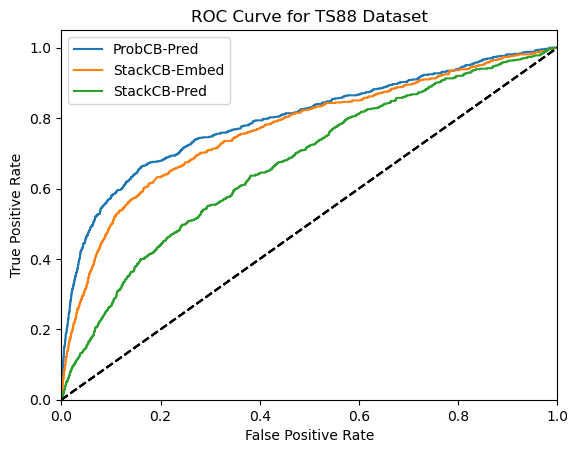

In [7]:
plt.figure()  

fpr, tpr, thresholds = roc_curve(TS88_Labels, pred_prob[:, 1], pos_label=None)
roc_auc = roc_auc_score(TS88_Labels, pred_prob[:, 1])
plt.plot(fpr, tpr, label=f'ProbCB-Pred' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='')

fpr, tpr, thresholds = roc_curve(stackcb_pred_ts88_label, stackcbembed_pred[:, 1], pos_label=None)
roc_auc = roc_auc_score(stackcb_pred_ts88_label, stackcbembed_pred[:, 1])
plt.plot(fpr, tpr, label=f'StackCB-Embed' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='')

fpr, tpr, thresholds = roc_curve(stackcb_pred_ts88_label, stackcb_pred[:, 1], pos_label=None)
roc_auc = roc_auc_score(stackcb_pred_ts88_label, stackcb_pred[:, 1])
plt.plot(fpr, tpr, label=f'StackCB-Pred' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for TS88 Dataset')
plt.legend()
plt.savefig('../../Results/ROC Curve TS88.jpg', facecolor='white', transparent=False )
plt.show()
